In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load
city_data_to_load = os.path.join('data', 'city_data.csv')
ride_data_to_load = os.path.join('data', 'ride_data.csv')

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
rides_data = ride_data.merge(city_data, on='city')

# Display the data table for preview
rides_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

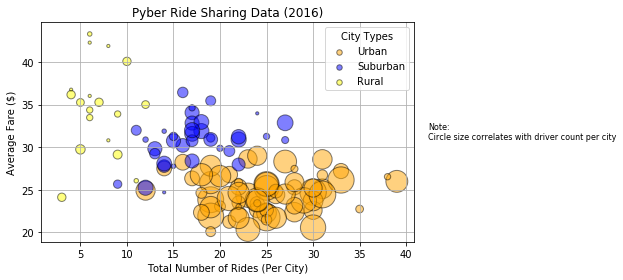

In [5]:
grouped_rides = rides_data.groupby('city')

x = grouped_rides['ride_id'].count().to_frame()
y = grouped_rides['fare'].mean().to_frame()

new_city = city_data.copy()
new_city = new_city.merge(x, left_on='city', right_index=True)
new_city = new_city.merge(y, left_on='city', right_index=True)
new_city['color'] = np.zeros((len(new_city['ride_id']),))
        
new_city = new_city.rename(columns={'ride_id': 'Total Number of Rides (Per City)',
                                    'fare': 'Average Fare ($)'})
        
# Break up DataFrames into three seperate ones for plot configuration
urban = new_city.loc[new_city['type'] == 'Urban']
suburban = new_city.loc[new_city['type'] == 'Suburban']
rural = new_city.loc[new_city['type'] == 'Rural']

# Plot seperate dataframes and make legend
plt.scatter(x=urban['Total Number of Rides (Per City)'], y=urban['Average Fare ($)'], c='orange',
            s=urban['driver_count']*10, alpha=0.5, edgecolors='black')
plt.scatter(x=suburban['Total Number of Rides (Per City)'], y=suburban['Average Fare ($)'], c='blue',
            s=suburban['driver_count']*10, alpha=0.5, edgecolors='black')
plt.scatter(x=rural['Total Number of Rides (Per City)'], y=rural['Average Fare ($)'], c='yellow',
            s=rural['driver_count']*10, alpha=0.5, edgecolors='black')
plt.grid()
lgnd = plt.legend(['Urban', 'Suburban', 'Rural'], title='City Types')

# Resize legend dots
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlabel('Total Number of Rides (Per City)');
plt.ylabel('Average Fare ($)');
plt.title('Pyber Ride Sharing Data (2016)');

# Add note to side of chart
textstr = 'Note:\nCircle size correlates with driver count per city'
plt.tight_layout()
plt.gcf().text(1., 0.5, textstr, fontsize=8);

# Save Figure
save_path = os.path.join('Assets', 'PyberRideSharingData2016.png')
plt.savefig(save_path)

## Total Fares by City Type

In [8]:
city_grouped = new_city.groupby('type')
rides_grouped = rides_data.groupby('type')
type_fares = rides_grouped['fare'].sum()
type_rides = city_grouped['Total Number of Rides (Per City)'].sum()
type_drivers = city_grouped['driver_count'].sum()

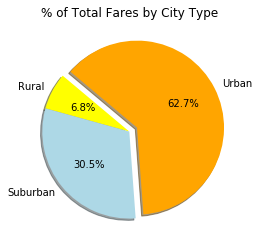

In [9]:
colors = ['yellow', 'lightblue', 'orange']
explode = (0, 0, 0.1)
labels = ['Rural', 'Suburban', 'Urban']

plt.pie(type_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.title('% of Total Fares by City Type')

save_path = os.path.join('Assets', 'TotalFaresByCityType.png')
plt.savefig(save_path)

## Total Rides by City Type

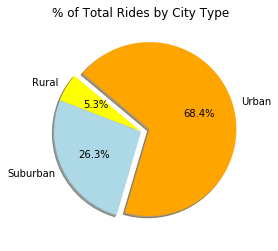

In [6]:
plt.pie(type_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.title('% of Total Rides by City Type');

save_path = os.path.join('Assets', 'TotalRidesByCityType.png')
plt.savefig(save_path)

## Total Drivers by City Type

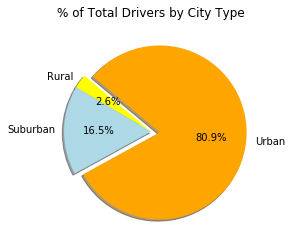

In [7]:
plt.pie(type_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.title('% of Total Drivers by City Type');

save_path = os.path.join('Assets', 'TotalDriversByCityType.png')
plt.savefig(save_path)